In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
path = "~/Repositories/datasets/logs/logs_all.csv"

In [95]:
df = pd.read_csv(path)

In [96]:
len(df)

753536

In [97]:
df.head()

,id,org,form,user,ghost,entity,systemType,message,created,entityType,systemId,is_team_join,is_registration,message_registration,message_team,message_amount,is_badge,is_welcomequest
0,12051611,0,0,1129440,0,1129440,44,linked transaction (4855897) to 1129440,2017-12-15 11:29:47,12,1129440,False,False,NaN,NaN,NaN,False,False
1,12051610,0,0,1129440,0,1129440,44,(1129440) has been registered,2017-12-15 11:29:47,12,1129440,False,True,1129440.0,NaN,NaN,False,False
2,12051609,537,923784,0,0,988439,23,cancelled recurring (988439),2017-12-15 11:29:40,37,988439,False,False,NaN,NaN,NaN,False,False
3,12051608,537,923784,0,0,988439,23,cancelled recurring (988439),2017-12-15 11:29:40,37,988439,False,False,NaN,NaN,NaN,False,False
4,12051607,438484,929389,1112324,0,808501,27,%contact_4004653% donated %amount_50.00% to %t...,2017-12-15 11:28:58,2,4409988,False,False,NaN,808501.0,50.0,False,False


In [98]:
df.message = df.message.astype(str)
df.form = df.form.fillna(0).astype(int)
df.entity = df.entity.fillna(0).astype(int)
df.user = df.user.fillna(0).astype(int)
df.systemType = df.systemType.fillna(0).astype(int)
df.entityType = df.entityType.fillna(0).astype(int)
df.systemId = df.systemId.fillna(0).astype(int)
df.org = df.org.fillna(0)
df.form = df.form.fillna(0)
df.ghost = df.ghost.fillna(0).astype(int)

Looks like I can pull quite a bit of info from the log messages so I need to set some entry category flags. Let's start with 

- team join
- registration
- registration ID found in the message
- team ID found in the message
- float amount found in the message

In [75]:
# setting relevant values based upon message content
df['is_team_join'] = df.message.str.contains('join')
df['is_registration'] = df.message.str.contains('registered')
df['message_registration'] = df.message.str.extract("%registration_(\d+)%")
df.loc[df.message_registration.isnull(), 'message_registration'] = df[df.message_registration.isnull()].message.str.extract("\((\d+)\) has been registered")
df['message_team'] = df.message.str.extract("%team_(\d+)%")
df['message_amount'] = df.message.str.extract("%amount_(\d+.\d+)%")

# set registration from entity for welcome quest steps
df.loc[(df.message_registration.isnull())&(df.systemType==28), 'message_registration'] = df[(df.message_registration.isnull())&(df.systemType==28)]['entity']
df['is_welcomequest'] = df.systemType==28
# set badge flag by systemType
df['is_badge'] = df.systemType==25

/Users/jeremyvanvalkenburg/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.
/Users/jeremyvanvalkenburg/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """
/Users/jeremyvanvalkenburg/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  
/Users/jeremyvanvalkenburg/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:7: FutureWarning: currently extract(expa

In [76]:
df.drop('count', axis=1, inplace=True)
df.drop('access', axis=1, inplace=True)
df.drop('hidden', axis=1, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('type', axis=1, inplace=True)
df.drop('ack', axis=1, inplace=True)
df.drop('data', axis=1, inplace=True)

ValueError: labels ['count'] not contained in axis

In [9]:
df[df.systemType==25].head(50)

,id,org,form,user,ghost,entity,systemType,message,created,entityType,systemId,is_team_join,is_registration,message_registration,message_team,message_amount,is_badge,is_welcomequest
39,12051571,381,929548,0,0,560099,25,%registration_560099% has earned the %badge_15...,2017-12-15 10:58:02,10,152075,False,False,560099,NaN,NaN,True,False
68,12051542,441550,928122,0,0,560707,25,%registration_560707% has earned the %badge_15...,2017-12-15 10:35:31,10,153339,False,False,560707,NaN,NaN,True,False
69,12051541,441550,928122,0,0,560707,25,%registration_560707% has earned the %badge_15...,2017-12-15 10:35:30,10,153273,False,False,560707,NaN,NaN,True,False
70,12051540,441550,928122,0,0,560707,25,%registration_560707% has earned the %badge_15...,2017-12-15 10:35:30,10,153272,False,False,560707,NaN,NaN,True,False
71,12051539,441550,928122,0,0,560707,25,%registration_560707% has earned the %badge_15...,2017-12-15 10:35:30,10,153271,False,False,560707,NaN,NaN,True,False
72,12051538,441550,928122,0,0,560707,25,%registration_560707% has earned the %badge_15...,2017-12-15 10:35:30,10,153270,False,False,560707,NaN,NaN,True,False
74,12051536,441550,928122,0,0,560707,25,%registration_560707% has earned the %badge_14...,2017-12-15 10:35:24,10,149478,False,False,560707,NaN,NaN,True,False
75,12051535,441550,928122,0,0,556958,25,%registration_556958% had the %badge_149478% r...,2017-12-15 10:35:24,10,149478,False,False,556958,NaN,NaN,True,False
83,12051527,438514,925838,0,0,560706,25,%registration_560706% has earned the %badge_14...,2017-12-15 10:29:21,10,148228,False,False,560706,NaN,NaN,True,False
94,12051516,438514,925838,0,0,560682,25,%registration_560682% has earned the %badge_14...,2017-12-15 10:13:13,10,148228,False,False,560682,NaN,NaN,True,False


In [160]:
df.systemType.value_counts()

27    197551
25    119412
13    102834
28     83878
12     58129
11     42654
44     30859
23     28901
24     25871
21     12971
34     12582
29      9115
36      7829
35      5430
32      4012
0       2492
18      2386
4       1731
41      1373
39      1344
40       861
15       569
42       286
43       191
20       174
38        87
26        11
8          3
Name: systemType, dtype: int64

In [177]:
df.to_csv(path, index=False)

In [247]:
df[df.message_registration==3073]

,id,org,form,user,ghost,entity,systemType,message,created,entityType,systemId,is_team_join,is_registration,message_registration,message_team,message_amount,is_badge,is_welcomequest
268930,11781204,753,499782,11379,607437,3073,28,Raise Your First Donation,2015-01-21 09:34:07,10,3088,False,False,3073,NaN,NaN,0,1
268936,11781198,753,499782,11379,607437,3073,28,Upload Your Avatar,2015-01-21 09:58:56,10,3085,False,False,3073,NaN,NaN,0,1
268996,11781138,753,499782,11379,607437,3073,28,Update Your Personal Page,2015-02-05 14:07:14,10,3086,False,False,3073,NaN,NaN,0,1
269236,11780898,753,499782,11379,607437,3073,28,Send a Fundraising Email,2015-03-02 14:05:14,10,3087,False,False,3073,NaN,NaN,0,1
269240,11780894,753,499782,11379,607437,3073,28,Schedule a Post on Facebook / Twitter,2015-03-02 14:07:15,10,3090,False,False,3073,NaN,NaN,0,1


In [10]:
df.message_registration = df.message_registration.fillna(0)
df.is_badge = df.is_badge.astype(int)
df.is_welcomequest = df.is_welcomequest.astype(int) 

In [235]:
reg_participation_data = []
regs = df[df.message_registration>0].message_registration.unique()
for i in range(len(regs)):
    r = regs[i]
    reg_participation_data.append({
        'registration': r, 
        'badges': len(df[(df.message_registration==r)&(df.is_badge==True)]),
        'welcomequest_steps': len(df[(df.message_registration==r)&(df.is_welcomequest==True)]),
    })
    if i % 1000 == 0:
        print("Done with {} registrations".format(i))
rpd_df = pd.DataFrame(reg_participation_data)
rpd_df.to_csv("~/Repositories/datasets/logs/reg_participation.csv")

Done with 0 registrations
Done with 1000 registrations
Done with 2000 registrations
Done with 3000 registrations
Done with 4000 registrations
Done with 5000 registrations
Done with 6000 registrations
Done with 7000 registrations
Done with 8000 registrations
Done with 9000 registrations
Done with 10000 registrations
Done with 11000 registrations
Done with 12000 registrations
Done with 13000 registrations
Done with 14000 registrations
Done with 15000 registrations
Done with 16000 registrations
Done with 17000 registrations
Done with 18000 registrations
Done with 19000 registrations
Done with 20000 registrations
Done with 21000 registrations
Done with 22000 registrations
Done with 23000 registrations
Done with 24000 registrations
Done with 25000 registrations
Done with 26000 registrations
Done with 27000 registrations
Done with 28000 registrations
Done with 29000 registrations
Done with 30000 registrations
Done with 31000 registrations
Done with 32000 registrations
Done with 33000 registr

In [248]:
gb = df.groupby('message_registration', as_index=False).agg({'is_badge': 'sum', 'is_welcomequest': 'sum'})

In [250]:
gb.to_csv("~/Repositories/datasets/logs/reg_participation.csv", index=False)

In [251]:
gb = pd.read_csv("~/Repositories/datasets/logs/reg_participation.csv")

In [254]:
gb.head()

,message_registration,is_badge,is_welcomequest
0,0,13025,0
1,1,0,4
2,2,0,2
3,3,0,2
4,2049,0,6


In [255]:
len(gb)

161748

In [257]:
df[(df.message_registration==0)&(df.systemType==25)].head()

,id,org,form,user,ghost,entity,systemType,message,created,entityType,systemId,is_team_join,is_registration,message_registration,message_team,message_amount,is_badge,is_welcomequest
118,12051492,33769,931089,0,0,808741,25,%team_808741% has earned the %badge_154974%,2017-12-15 09:44:17,2,154974,False,False,0,808741,NaN,1,0
119,12051491,33769,931089,0,0,808741,25,%team_808741% has earned the %badge_154973%,2017-12-15 09:44:16,2,154973,False,False,0,808741,NaN,1,0
288,12051322,442063,930076,0,0,808532,25,%team_808532% had the %badge_152955% revoked,2017-12-14 18:00:13,2,152955,False,False,0,808532,NaN,1,0
292,12051318,442063,930076,0,0,808208,25,%team_808208% has earned the %badge_152955%,2017-12-14 17:59:12,2,152955,False,False,0,808208,NaN,1,0
361,12051249,441545,930663,0,0,808580,25,%team_808580% had the %badge_153919% revoked,2017-12-14 16:54:08,2,153919,False,False,0,808580,NaN,1,0


In [258]:
gb.is_welcomequest.value_counts()

0    113271
1     29494
2      9435
3      5045
4      2594
5      1453
6       454
7         2
Name: is_welcomequest, dtype: int64

# Time series

While we can easily see a correlation between working through the welcome quest or accumulating badges and fund raising, we cannot say that why this is the case. In other words, are these participants raising more funds because they are incentivized by these factors or are they achieving these anciliary achievements simply because they are high performers.

Looking at the average time it takes to achieve these results may give some insight into this. My assumption would be that, for instance, rapid completion the welcome quest would be a consequence of a user deliberately doing so whereas if this takes some time to complete it is more likely that it is a side effect of otherwise normal user behavior (for the given user).

In [287]:
# filter to only welcome quest entries, grouping by registration
ts_df = df[df.systemType==28][['message_registration', 'created']].sort_values('created').groupby('message_registration')
# rearrange to get single row per participant
ts_df = ts_df.apply(lambda x: pd.DataFrame(x.values)).unstack()
ts_df.columns = ts_df.columns.droplevel()
ts_df = ts_df.reset_index()
ts_df.columns = ['registration', 'x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'step1', 'step2', 'step3', 'step4', 'step5', 'step6', 'step7']
ts_df.drop(['x_0', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6'], axis=1, inplace=True)

In [289]:
ts_df.head(10)

,registration,step1,step2,step3,step4,step5,step6,step7
0,1,2015-01-09 14:19:07,2015-01-09 14:20:44,2015-01-09 14:34:06,2015-01-09 14:38:17,None,None,None
1,2,2015-01-09 14:35:02,2015-01-29 10:28:11,None,None,None,None,None
2,3,2015-01-09 14:42:12,2015-01-09 14:46:19,None,None,None,None,None
3,2049,2015-01-21 09:27:28,2015-01-21 09:30:46,2015-01-21 09:39:23,2015-01-21 09:51:01,2015-01-21 09:53:50,2015-01-21 10:04:28,None
4,3073,2015-01-21 09:34:07,2015-01-21 09:58:56,2015-02-05 14:07:14,2015-03-02 14:05:14,2015-03-02 14:07:15,None,None
5,3074,2015-01-21 09:39:23,2015-01-21 09:45:02,2015-01-21 09:46:37,None,None,None,None
6,3075,2015-01-21 15:53:03,2015-01-21 15:53:41,2015-01-21 15:56:36,None,None,None,None
7,4097,2015-01-22 10:18:56,None,None,None,None,None,None
8,4098,2015-01-22 10:10:52,None,None,None,None,None,None
9,4101,2015-01-22 14:27:16,2015-01-22 14:29:19,2015-01-22 14:30:10,2015-01-22 14:32:53,2015-01-22 14:48:02,2015-01-22 15:00:57,None


In [315]:
ts_df['time_to_step_2'] = pd.to_datetime(ts_df.step2) - pd.to_datetime(ts_df.step1)
ts_df['time_to_step_3'] = pd.to_datetime(ts_df.step3) - pd.to_datetime(ts_df.step2)
ts_df['time_to_step_4'] = pd.to_datetime(ts_df.step4) - pd.to_datetime(ts_df.step3)
ts_df['time_to_step_5'] = pd.to_datetime(ts_df.step5) - pd.to_datetime(ts_df.step4)
ts_df['time_to_step_6'] = pd.to_datetime(ts_df.step6) - pd.to_datetime(ts_df.step5)
ts_df['time_to_step_7'] = pd.to_datetime(ts_df.step7) - pd.to_datetime(ts_df.step6)

ts_df['time_to_step_2'] = ts_df['time_to_step_2'].astype('timedelta64[h]')
ts_df['time_to_step_3'] = ts_df['time_to_step_3'].astype('timedelta64[h]')
ts_df['time_to_step_4'] = ts_df['time_to_step_4'].astype('timedelta64[h]')
ts_df['time_to_step_5'] = ts_df['time_to_step_5'].astype('timedelta64[h]')
ts_df['time_to_step_6'] = ts_df['time_to_step_6'].astype('timedelta64[h]')
ts_df['time_to_step_7'] = ts_df['time_to_step_7'].astype('timedelta64[h]')

In [316]:
ts_df[['time_to_step_2', 'time_to_step_3', 'time_to_step_4', 'time_to_step_5', 'time_to_step_6', 'time_to_step_7']].mean()

time_to_step_2    148.692462
time_to_step_3    168.717951
time_to_step_4    163.762159
time_to_step_5    197.247250
time_to_step_6    222.942982
time_to_step_7    583.000000
dtype: float64

In [317]:
ts_df[['time_to_step_2', 'time_to_step_3', 'time_to_step_4', 'time_to_step_5', 'time_to_step_6', 'time_to_step_7']].std()

time_to_step_2    498.449155
time_to_step_3    549.812655
time_to_step_4    431.352264
time_to_step_5    474.254497
time_to_step_6    423.421808
time_to_step_7    769.332178
dtype: float64

In [326]:
ts_df['total_time'] = ts_df['time_to_step_2'].fillna(0) +\
                        ts_df['time_to_step_3'].fillna(0) + \
                        ts_df['time_to_step_4'].fillna(0) + \
                        ts_df['time_to_step_5'].fillna(0) +\
                        ts_df['time_to_step_6'].fillna(0) +\
                        ts_df['time_to_step_7'].fillna(0)

In [338]:
len_df = len(ts_df)
one_or_none = len(ts_df[ts_df.step2.isnull()])
print("Total completing 1 or 0 steps: {} ({}%)".format(one_or_none, (float(one_or_none) / float(len_df)) * 100))

for i in [2, 3, 4, 5, 6, 7]:
    print("Those who completed {} steps:".format(i))
    msk = ts_df[ts_df['time_to_step_{}'.format(i)].notnull()]
    
    total = len(msk)
    under_6_hours = len(msk[msk['total_time']<6])
    under_12_hours = len(msk[msk['total_time']<12])
    under_24_hours = len(msk[msk['total_time']<24])

    print("\ttotal entries: {} ({}%)".format(total, (float(total)/float(len_df))*100))
    print("\ttotal under 6 hours: {}".format(under_6_hours))
    print("\ttotal under 12 hours: {}".format(under_12_hours))
    print("\ttotal under 24 hours: {}".format(under_24_hours))

Total completing 1 or 0 steps: 29494 (60.8412236731%)
Those who completed 2 steps:
	total entries: 18983 (39.1587763269%)
	total under 6 hours: 7345
	total under 12 hours: 7798
	total under 24 hours: 8791
Those who completed 3 steps:
	total entries: 9548 (19.69593828%)
	total under 6 hours: 2687
	total under 12 hours: 2955
	total under 24 hours: 3513
Those who completed 4 steps:
	total entries: 4503 (9.28894114735%)
	total under 6 hours: 1073
	total under 12 hours: 1191
	total under 24 hours: 1452
Those who completed 5 steps:
	total entries: 1909 (3.93794995565%)
	total under 6 hours: 387
	total under 12 hours: 438
	total under 24 hours: 552
Those who completed 6 steps:
	total entries: 456 (0.940652268086%)
	total under 6 hours: 64
	total under 12 hours: 79
	total under 24 hours: 105
Those who completed 7 steps:
	total entries: 2 (0.00412566784248%)
	total under 6 hours: 0
	total under 12 hours: 0
	total under 24 hours: 0


In [339]:
ts_df.to_csv("~/Repositories/datasets/logs/reg_part_timeline.csv", index=False)

In [340]:
ts_df.total_time.mean()

116.5571714421272

# Pulling team member data

In [344]:
len(df[df.is_team_join==True].message_registration.unique())

75636

In [345]:
df[df.is_team_join==True].to_csv("~/Repositories/datasets/logs/team_joins.csv")

# Coincidence of badges & welcome quest

In [11]:
gb = pd.read_csv("~/Repositories/datasets/logs/reg_participation.csv")

In [13]:
gb.corr()

,message_registration,is_badge,is_welcomequest
message_registration,1.000000,-0.014074,-0.184603
is_badge,-0.014074,1.000000,-0.011585
is_welcomequest,-0.184603,-0.011585,1.000000


In [24]:
len_gb = len(gb)

more_than_1 = float(len(gb[(gb.is_badge>0)&(gb.is_welcomequest>0)])) / float(len_gb)
not_the_other = (float(len(gb[(gb.is_badge>0)&(gb.is_welcomequest==0)])) + float(len(gb[(gb.is_welcomequest>0)&(gb.is_badge==0)]))) / float(len_gb)
neither = float(len(gb[(gb.is_badge==0)&(gb.is_welcomequest==0)])) / float(len_gb)

print("Percentage with more than badges and welcome quest steps: {}".format(more_than_1 * 100))
print("Percentage with 1 and not the other: {}".format(not_the_other * 100))
print("Percentage with neither: {}".format(neither * 100))

Percentage with more than badges and welcome quest steps: 0.0
Percentage with 1 and not the other: 50.7394218167
Percentage with neither: 49.2605781833


## When are things happening?

In [126]:
df = df[~df.created.isnull()]
df['created'] = pd.to_datetime(df['created'], errors="coerce")
df['created_hour'] = df.created.dt.hour
df['created_day'] = df.created.dt.day
df['created_dayofweek'] = df.created.dt.dayofweek

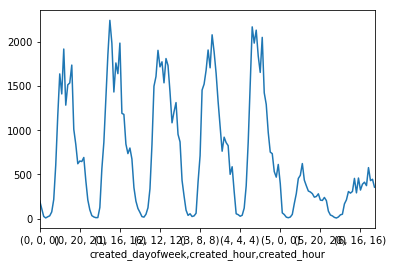

In [128]:
df[df.is_badge==True].groupby(['created_dayofweek','created_hour'])['created_hour'].value_counts().plot()

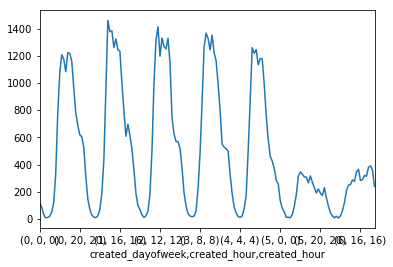

In [132]:
df[df.is_welcomequest==True].groupby(['created_dayofweek','created_hour'])['created_hour'].value_counts().plot()

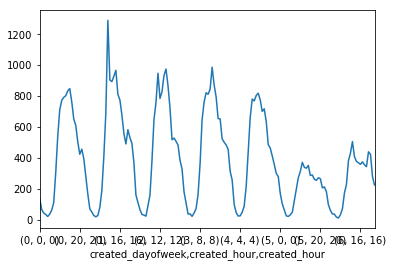

In [131]:
df[df.is_registration==True].groupby(['created_dayofweek','created_hour'])['created_hour'].value_counts().plot()

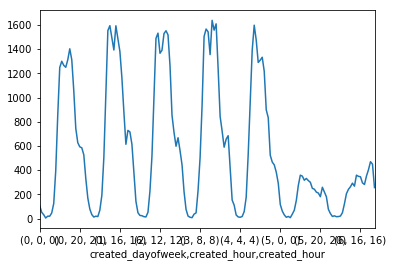

In [130]:
df[df.is_team_join==True].groupby(['created_dayofweek','created_hour'])['created_hour'].value_counts().plot()

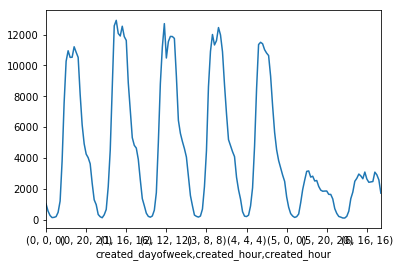

In [129]:
df.groupby(['created_dayofweek','created_hour'])['created_hour'].value_counts().plot()

**Hourly**

Not much to see here. It is interesting that nearly everything appears to be happening at roughly the same time, same distribution. Some of these are kind of obvious (ie, if registrations peak, it would make sense that team joins peak at the same time) but I would assume the badges and welcome quest would diverge from registration patterns after the initial registration. It would appear that all activity peaks around 10AM with a second peak around 2PM. Given this is all user-driven behavior, my assumption here is that these are lulls in the workday (mid-morning break, mid-afternoon break).

**Monthly**

For the month, there's a clear trend of decreasing activity throughout the month suggesting most user activity is happening at the beginning. Some appear to have pretty stable means throughout, but the variance significantly decreases, so even in those cases there is a greater concentration toward the beginning of the month.

What is most interesting here is that the data would appear to suggest there is not peak registration time as we see in the qgiv data where there are outstanding surges in activity around the 1st and the 15th of the month from donations on paydays. P2P seems to be immune to this, varying quite a bit but with no evident trend within the month. My assumption is that the data is being skewed toward average weekends resulting in 6 peaks and 8 valleys, possibly pulled that way by particuarly active months when big events were taking place.

**Weekly**

The weekly distributions appear to be quite consistent throughout with the weekends being all but dead and a clear peak of activity on Tuesday's. Team joins deviates from this the most with Tuesday only barely edging out the other days and all weekdays appearing to be nearly equal. The pattern remains, but the differences are insignificant such that this could be random.

Most days appear to hold true to the aforementioned patterns of peaking in the mornings and early afternoons. Weekends for some activities hold a little more steady throughout the day, either consistantly throughout or consistently downward without any significant peaks or valleys.

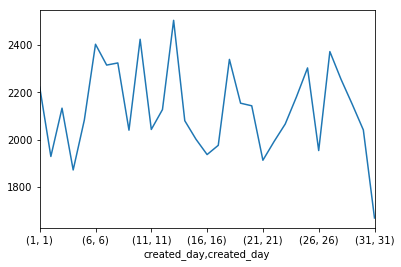

In [133]:
df[df.is_registration==True].groupby('created_day')['created_day'].value_counts().plot()

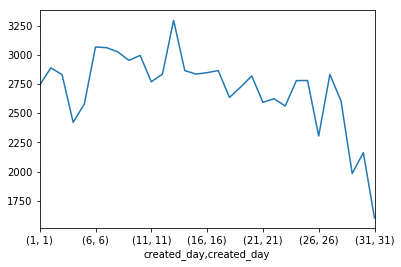

In [140]:
df[df.systemType==28].groupby('created_day')['created_day'].value_counts().plot()

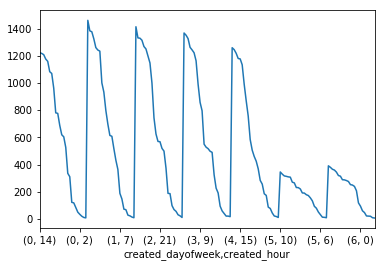

In [138]:
df[df.systemType==28].groupby('created_dayofweek')['created_hour'].value_counts().plot()

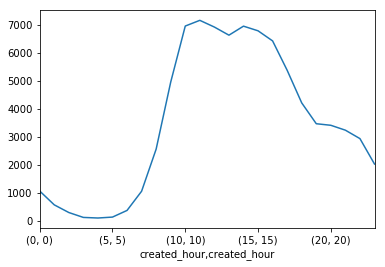

In [137]:
df[df.systemType==28].groupby('created_hour')['created_hour'].value_counts().plot()

In [141]:
df.columns

Index([u'id', u'org', u'form', u'user', u'ghost', u'entity', u'systemType',
       u'message', u'created', u'entityType', u'systemId', u'is_team_join',
       u'is_registration', u'message_registration', u'message_team',
       u'message_amount', u'is_badge', u'is_welcomequest', u'created_hour',
       u'created_day', u'created_dayofweek'],
      dtype='object')

# Badges awarded per event

In [221]:
form_badge_counts = df[df.systemType==28].groupby('form')['form'].value_counts()
form_badge_counts.index = form_badge_counts.index.droplevel()
fbc_df = pd.DataFrame(form_badge_counts)
fbc_df.columns = ['badge_count']
fbc_df = fbc_df.reset_index()

print("Total forms in list: {}".format(len(form_badge_counts)))
print("Mean: {}".format(form_badge_counts.mean()))

print("Forms w/ < 5: {}".format(len(fbc_df[fbc_df.badge_count<5])))
print("Forms w/ > 300: {}".format(len(fbc_df[fbc_df.badge_count>300])))

pd.value_counts(pd.cut(fbc_df['badge_count'], bins=[0, 10, 25, 100, 250, 500, 4000])).sort_index()

Total forms in list: 891
Mean: 94.1391694725
Forms w/ < 5: 140
Forms w/ > 300: 58


(0, 10]        244
(10, 25]       118
(25, 100]      292
(100, 250]     167
(250, 500]      44
(500, 4000]     26
Name: badge_count, dtype: int64

These numbers are lower than I would have exptected to see. I wonder how many participants are actually earning badges. Let's start by trying to determine the typical numbers of participants that register for events.

In [231]:
form_reg_logs = df[df.is_registration==True].groupby('form').is_registration.count()
frl_df = pd.DataFrame(form_reg_logs)
frl_df = frl_df.reset_index()
print("Average registrations: {}".format(frl_df.is_registration.mean()))
pd.value_counts(pd.cut(frl_df.is_registration, bins=[0, 25, 50, 100, 250, 500, 2500]))

Average registrations: 39.7738238842


(0, 25]        1305
(25, 50]        141
(50, 100]       102
(100, 250]       71
(250, 500]       30
(500, 2500]       8
Name: is_registration, dtype: int64

In [235]:
fb_df = fbc_df.merge(frl_df, left_on="form", right_on="form")
fb_df['per_reg_badge'] = fb_df.badge_count / fb_df.is_registration

In [237]:
fb_df.per_reg_badge.describe()

count    682.000000
mean       9.401971
std       43.487203
min        0.018797
25%        1.000000
50%        2.022890
75%        4.350791
max      955.250000
Name: per_reg_badge, dtype: float64

In [241]:
pd.value_counts(pd.cut(fb_df.per_reg_badge, bins=[0, 0.5, 1, 2, 3, 4, 5, 10])).sort_index()

(0.0, 0.5]      69
(0.5, 1.0]     106
(1.0, 2.0]     164
(2.0, 3.0]     107
(3.0, 4.0]      58
(4.0, 5.0]      22
(5.0, 10.0]     58
Name: per_reg_badge, dtype: int64

# Association badges to donations

Carrying over the method used in social post history to look at the distribution of donations around badge awards in order to attempt to determine some causation between the two.

In [3]:
logs = pd.read_csv("/Users/jeremyvanvalkenburg/Repositories/datasets/logs/logs_all.csv")

/Users/jeremyvanvalkenburg/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
logs['created'] = pd.to_datetime(logs['created'], errors="ignore")
# mask to isolate donations
msk_don = logs.message.str.contains('donated').fillna(False)
donations = logs[msk_don]
# mask to isolate badge awards
msk_bdg = logs.is_badge==True
badges = logs[msk_bdg]

print("{} donations; {} badge awards".format(len(donations), len(badges)))

139499 donations; 119412 badge awards


In [11]:
badges = badges.copy()
badges['preceding_donations'] = badges.apply(lambda x: len(donations[(donations['created']<x['created'])&(donations['entity']==x['entity'])]), axis=1)
badges['proceeding_donations'] = badges.apply(lambda x: len(donations[(donations['created']>x['created'])&(donations['entity']==x['entity'])]), axis=1)

In [12]:
badges[['id', 'entity', 'entityType', 'is_badge', 'preceding_donations', 'proceeding_donations']].head()

,id,entity,entityType,is_badge,preceding_donations,proceeding_donations
39,12051571,560099,10,True,8,0
68,12051542,560707,10,True,0,0
69,12051541,560707,10,True,0,0
70,12051540,560707,10,True,0,0
71,12051539,560707,10,True,0,0


In [13]:
badges[['preceding_donations', 'proceeding_donations']].describe()

,preceding_donations,proceeding_donations
count,119412.000000,119412.000000
mean,1.371738,1.712198
std,3.973051,5.104614
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,198.000000,153.000000


In [16]:
from datetime import timedelta

def concentration_before(x):
    w_in_day_delta = timedelta(days=1)
    w_in_2days_delta = timedelta(days=2)
    w_in_3days_delta = timedelta(days=3)
    
    w_in_day = float(len(donations[(donations['created']<(x['created']-w_in_day_delta))&(donations['entity']==x['entity'])]))
    w_in_2days = 0.5 * float(len(donations[(donations['created']<(x['created']-w_in_2days_delta))&(donations['entity']==x['entity'])]))
    w_in_3days = 0.2 * float(len(donations[(donations['created']<(x['created']-w_in_3days_delta))&(donations['entity']==x['entity'])]))
    
    return w_in_day + w_in_2days + w_in_3days

def concentration_after(x):
    w_in_day_delta = timedelta(days=1)
    w_in_2days_delta = timedelta(days=2)
    w_in_3days_delta = timedelta(days=3)
    
    w_in_day = float(len(donations[(donations['created']>(x['created']-w_in_day_delta))&(donations['entity']==x['entity'])]))
    w_in_2days = 0.5 * float(len(donations[(donations['created']>(x['created']-w_in_2days_delta))&(donations['entity']==x['entity'])]))
    w_in_3days = 0.2 * float(len(donations[(donations['created']>(x['created']-w_in_3days_delta))&(donations['entity']==x['entity'])]))
    
    return w_in_day + w_in_2days + w_in_3days

In [24]:
badges['preceding_concentration'] = badges.apply(concentration_before, axis=1)
badges['proceeding_concentration'] = badges.apply(concentration_after, axis=1)

In [25]:
badges[['preceding_concentration', 'proceeding_concentration']].describe()

,preceding_concentration,proceeding_concentration
count,119412.000000,119412.000000
mean,1.512328,3.759719
std,5.938090,9.439003
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,3.400000
max,336.600000,273.700000


Here we see that there are on average 1.37 donations preceding a badge award and 1.71 donations following it. The decaying density averages being 1.51 preceding and 3.76 proceeding. 

This would lead me to believe that badges are indeed driving fundraising. My guess is that the badge is inspiring the participant, or perhaps simply raising their profile with some event-wide exposure.

In [26]:
x_pre = 5.434025
x_post = 5.284498
plus = x_pre + x_post

print("Pre: {}; Post: {}".format(x_pre/plus, x_post/plus))

Pre: 0.506975168127; Post: 0.493024831873
